In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Importing Relevant Python Packages

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/cleaned_customer_supermarket.csv')
data.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum,latitude,longitude,geometry,InvoiceMonth,CohortMonth,CohortIndex
0,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,15.30,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,22.00,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1
4,84029E,RED WOOLLY HOTTIE WHITE HEART,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1


In [4]:
data['Description'] = data.Description.str.lower()

### Visualizing top-selling items along with Unit Price

In [5]:
top_item = pd.DataFrame(data.groupby(['StockCode', 'Description']).size())
top_item.columns = ['Count']
top_item.sort_values(by='Count', ascending=False, inplace=True)
top_item.reset_index(inplace=True)
#top_item = top_item.loc[:, ['StockCode', 'Description', 'Quantity']]
#top_item.head(10)

price = data.groupby(['StockCode', 'Description']).mean()
top_item = top_item.merge(price, on=['StockCode', 'Description'], how='left')
top_item = top_item.loc[:, ['StockCode', 'Description', 'Count', 'UnitPrice']]
top_item = top_item.loc[:10,]
top_item.set_index('Description', drop=True, inplace=True)
top_item

<ipython-input-5-1901c540e6c9>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price = data.groupby(['StockCode', 'Description']).mean()


,StockCode,Count,UnitPrice
Description,,,
white hanging heart tlight holder,85123A,2070,2.891362
regency cakestand tier,22423,1904,12.435951
jumbo bag red retrospot,85099B,1662,2.013057
assorted colour bird ornament,84879,1418,1.680860
party bunting,47566,1415,4.874247
lunch bag red retrospot,20725,1358,1.656922
set of cake tins pantry design,22720,1232,4.951128
lunch bag black skull,20727,1126,1.643073
lunch bag suki design,22383,1103,1.650762


In [6]:
new_idx=[]
for index in top_item.index:
    desc = index.split(' ')
    if len(desc) > 3:
        desc = ' '.join(desc[:3]) + '\n' + ' '.join(desc[3:])
    elif len(desc) > 2:
        desc = ' '.join(desc[:2]) + '\n' + ' '.join(desc[2:])
    else:
        desc = ' '.join(desc)
    new_idx.append(desc)
    
top_item.index = new_idx

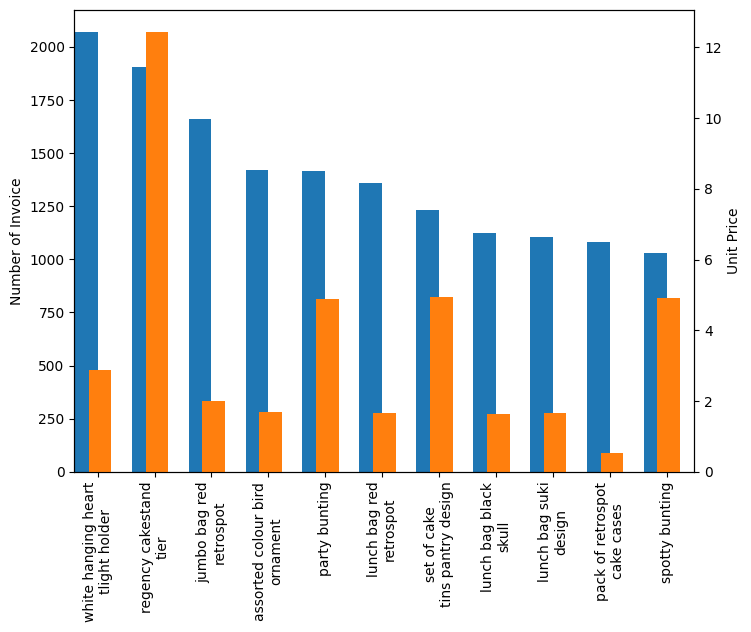

In [7]:
fig = plt.figure(figsize=(8,6)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.4

top_item.Count.plot(kind='bar', color='#1f77b4', ax=ax, width=width, position=1)
top_item.UnitPrice.plot(kind='bar', color='#ff7f0e', ax=ax2, width=width, position=0.4)

ax.set_ylabel('Number of Invoice')
ax2.set_ylabel('Unit Price')

plt.show()

### Items with high total sales amount

In [8]:
totalSales = data.groupby(['Description']).sum()
totalSales.sort_values(by='TotalSum', ascending=False, inplace=True)
totalSales = totalSales.iloc[:10,]

new_idx=[]
for index in totalSales.index:
    desc = index.split(' ')
    if len(desc) > 3:
        desc = ' '.join(desc[:3]) + '\n' + ' '.join(desc[3:])
    elif len(desc) > 2:
        desc = ' '.join(desc[:2]) + '\n' + ' '.join(desc[2:])
    else:
        desc = ' '.join(desc)
    new_idx.append(desc)
    
totalSales.index = new_idx

<ipython-input-8-99359011c6b9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totalSales = data.groupby(['Description']).sum()


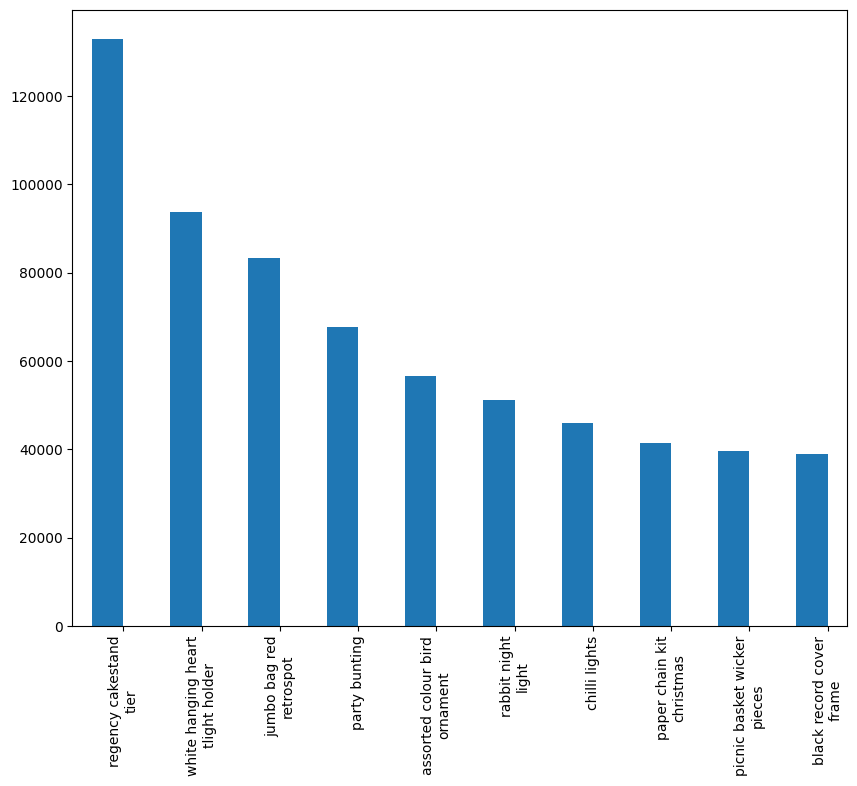

In [9]:
fig = plt.figure(figsize=(10,8)) # Create matplotlib figure

ax = fig.add_subplot(111)
totalSales.TotalSum.plot(kind='bar', color='#1f77b4', ax=ax, width=width, position=1)

plt.show()

In [10]:
def new_data(data,country):
  return data[data.Country==country]

In [11]:
data=new_data(data,'United Kingdom')

In [12]:
data.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum,latitude,longitude,geometry,InvoiceMonth,CohortMonth,CohortIndex
0,85123A,white hanging heart tlight holder,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,15.30,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1
1,71053,white metal lantern,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1
2,84406B,cream cupid hearts coat hanger,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,22.00,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1
3,84029G,knitted union flag hot water bottle,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1
4,84029E,red woolly hottie white heart,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,55.378051,-3.435973,POINT (-3.435973 55.378051),2010-12-01,2010-12-01,1


In [13]:
df=data.loc[:,['Invoice_No','StockCode','Description','Quantity']]

In [14]:
df['Invoice_No'] = df.Invoice_No.astype('str')
df.sort_values(by='Invoice_No', inplace=True)
df.head()

,Invoice_No,StockCode,Description,Quantity
0,536365,85123A,white hanging heart tlight holder,6
1,536365,71053,white metal lantern,6
2,536365,84406B,cream cupid hearts coat hanger,8
3,536365,84029G,knitted union flag hot water bottle,6
4,536365,84029E,red woolly hottie white heart,6


In [15]:
df['Description'] = df.Description.str.replace(' ', '_')

## Creating baskets for each invoice

In [16]:
basket = (df.groupby(['Invoice_No', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0)\
          .set_index('Invoice_No'))

In [17]:
basket.head()

Description,a_pretty_thank_you_card,a_wall_tidy_blue_office,a_wall_tidy_red_flowers,abc_treasure_book_box,abstract_circle_journal,abstract_circles_pocket_book,abstract_circles_sketchbook,acrylic_geometric_lamp,acrylic_hanging_jewelblue,acrylic_hanging_jewelpink,...,zinc_star_tlight_holder,zinc_sweetheart_soap_dish,zinc_sweetheart_wire_letter_rack,zinc_tlight_holder_star_large,zinc_tlight_holder_stars_large,zinc_tlight_holder_stars_small,zinc_top_door_wooden_shelf,zinc_willie_winkie_candle_stick,zinc_wire_kitchen_organiser,zinc_wire_sweetheart_letter_tray
Invoice_No,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Converting quantity for each item as 0/1

In [18]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [19]:
basket_sets.head()

Description,a_pretty_thank_you_card,a_wall_tidy_blue_office,a_wall_tidy_red_flowers,abc_treasure_book_box,abstract_circle_journal,abstract_circles_pocket_book,abstract_circles_sketchbook,acrylic_geometric_lamp,acrylic_hanging_jewelblue,acrylic_hanging_jewelpink,...,zinc_star_tlight_holder,zinc_sweetheart_soap_dish,zinc_sweetheart_wire_letter_rack,zinc_tlight_holder_star_large,zinc_tlight_holder_stars_large,zinc_tlight_holder_stars_small,zinc_top_door_wooden_shelf,zinc_willie_winkie_candle_stick,zinc_wire_kitchen_organiser,zinc_wire_sweetheart_letter_tray
Invoice_No,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Generating frequent itemsets using Apriori principle
Min. support threshold = 1%

In [21]:
sup = 0.01
frequent_itemsets = apriori(basket_sets, min_support=sup, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

,support,itemsets,length
0,0.013734,(aged_glass_silver_tlight_holder),1
1,0.011641,(airline_bag_vintage_tokyo),1
2,0.014041,(alarm_clock_bakelike_chocolate),1
3,0.035229,(alarm_clock_bakelike_green),1
4,0.021648,(alarm_clock_bakelike_ivory),1


In [22]:
def to_String(text):
    return str(text)[10:-1]

## Creating association rules using frequent itemsets

In [23]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4, support_only=False)
rules['antecedents'] = rules.antecedents.apply(to_String)
rules['consequents'] = rules.consequents.apply(to_String)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,{'alarm_clock_bakelike_ivory'},{'alarm_clock_bakelike_green'},0.021648,0.035229,0.012662,0.584906,16.602844,0.011899,2.324220
1,{'alarm_clock_bakelike_pink'},{'alarm_clock_bakelike_green'},0.025069,0.035229,0.014092,0.562118,15.956008,0.013209,2.203267
2,{'alarm_clock_bakelike_green'},{'alarm_clock_bakelike_pink'},0.035229,0.025069,0.014092,0.400000,15.956008,0.013209,1.624885
3,{'alarm_clock_bakelike_red'},{'alarm_clock_bakelike_green'},0.038752,0.035229,0.023180,0.598155,16.978946,0.021815,2.400856
4,{'alarm_clock_bakelike_green'},{'alarm_clock_bakelike_red'},0.035229,0.038752,0.023180,0.657971,16.978946,0.021815,2.810428


In [24]:
print(rules.shape)
rules['support_perc'] = rules.support/basket_sets.shape[0]
rules['Rule'] = rules.antecedents + " => " + rules.consequents
rules.head()

(298, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_perc,Rule
0,{'alarm_clock_bakelike_ivory'},{'alarm_clock_bakelike_green'},0.021648,0.035229,0.012662,0.584906,16.602844,0.011899,2.324220,6.464876e-07,{'alarm_clock_bakelike_ivory'} => {'alarm_cloc...
1,{'alarm_clock_bakelike_pink'},{'alarm_clock_bakelike_green'},0.025069,0.035229,0.014092,0.562118,15.956008,0.013209,2.203267,7.194781e-07,{'alarm_clock_bakelike_pink'} => {'alarm_clock...
2,{'alarm_clock_bakelike_green'},{'alarm_clock_bakelike_pink'},0.035229,0.025069,0.014092,0.400000,15.956008,0.013209,1.624885,7.194781e-07,{'alarm_clock_bakelike_green'} => {'alarm_cloc...
3,{'alarm_clock_bakelike_red'},{'alarm_clock_bakelike_green'},0.038752,0.035229,0.023180,0.598155,16.978946,0.021815,2.400856,1.183489e-06,{'alarm_clock_bakelike_red'} => {'alarm_clock_...
4,{'alarm_clock_bakelike_green'},{'alarm_clock_bakelike_red'},0.035229,0.038752,0.023180,0.657971,16.978946,0.021815,2.810428,1.183489e-06,{'alarm_clock_bakelike_green'} => {'alarm_cloc...


## Rules having multiple itemsets in antecedents/consequents

In [25]:
rules[(rules.antecedents.str.contains(',')) | (rules.consequents.str.contains(','))].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_perc,Rule
181,"{'alarm_clock_bakelike_red', 'alarm_clock_bake...",{'alarm_clock_bakelike_green'},0.016338,0.035229,0.010773,0.659375,18.716694,0.010197,2.832355,5.500358e-07,"{'alarm_clock_bakelike_red', 'alarm_clock_bake..."
182,"{'alarm_clock_bakelike_red', 'alarm_clock_bake...",{'alarm_clock_bakelike_pink'},0.023180,0.025069,0.010773,0.464758,18.539194,0.010192,1.821476,5.500358e-07,"{'alarm_clock_bakelike_red', 'alarm_clock_bake..."
183,"{'alarm_clock_bakelike_green', 'alarm_clock_ba...",{'alarm_clock_bakelike_red'},0.014092,0.038752,0.010773,0.764493,19.727741,0.010227,4.081606,5.500358e-07,"{'alarm_clock_bakelike_green', 'alarm_clock_ba..."
184,{'alarm_clock_bakelike_pink'},"{'alarm_clock_bakelike_red', 'alarm_clock_bake...",0.025069,0.023180,0.010773,0.429735,18.539194,0.010192,1.712924,5.500358e-07,{'alarm_clock_bakelike_pink'} => {'alarm_clock...
185,"{'green_regency_teacup_and_saucer', 'regency_c...",{'pink_regency_teacup_and_saucer'},0.016389,0.025171,0.011743,0.716511,28.465685,0.011331,3.438682,5.995651e-07,"{'green_regency_teacup_and_saucer', 'regency_c..."


## Confidence vs Support graph

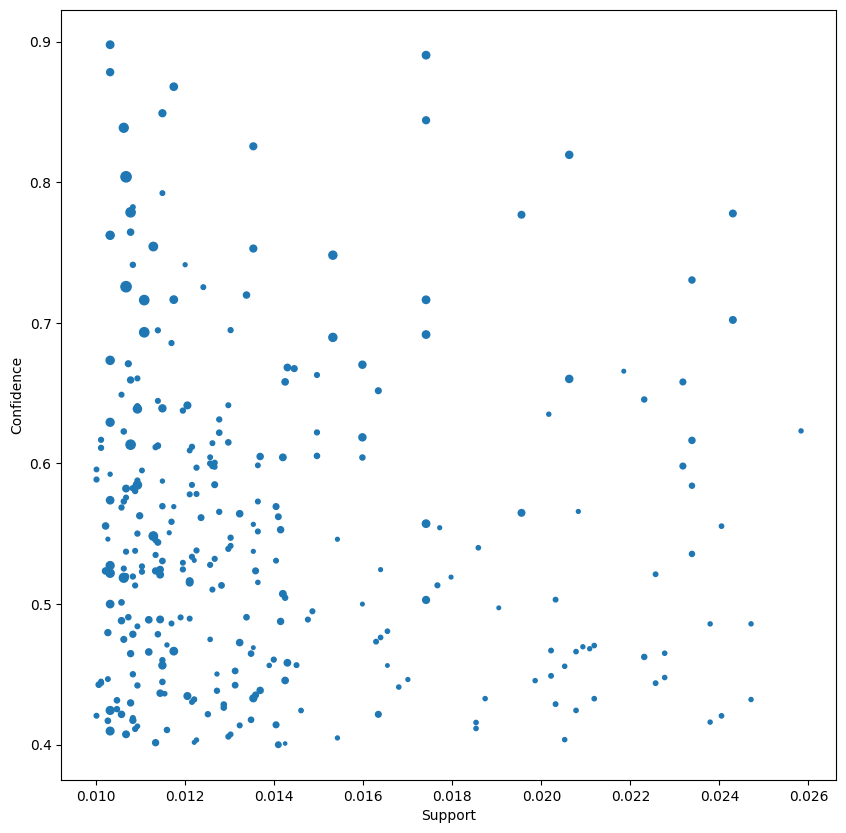

In [26]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(rules.support, rules.confidence, rules.lift)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

## Visualizing association rules using network graphs

In [34]:
import networkx as nx
G1 = nx.DiGraph()
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, edgelist = edges, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)


plt.savefig('network_graph.png')

Output hidden; open in https://colab.research.google.com to view.

## Rules with high lift value

In [28]:
rules.sort_values(by='lift', ascending=False, inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_perc,Rule
159,{'poppys_playhouse_kitchen'},{'poppys_playhouse_bedroom'},0.014704,0.013275,0.010671,0.725694,54.667121,0.010476,3.597175,5.448222e-07,{'poppys_playhouse_kitchen'} => {'poppys_playh...
158,{'poppys_playhouse_bedroom'},{'poppys_playhouse_kitchen'},0.013275,0.014704,0.010671,0.803846,54.667121,0.010476,5.023076,5.448222e-07,{'poppys_playhouse_bedroom'} => {'poppys_playh...
16,{'blue_happy_birthday_bunting'},{'pink_happy_birthday_bunting'},0.015470,0.015981,0.011079,0.716172,44.814496,0.010832,3.466951,5.656766e-07,{'blue_happy_birthday_bunting'} => {'pink_happ...
15,{'pink_happy_birthday_bunting'},{'blue_happy_birthday_bunting'},0.015981,0.015470,0.011079,0.693291,44.814496,0.010832,3.209977,5.656766e-07,{'pink_happy_birthday_bunting'} => {'blue_happ...
171,{'small_dolly_mix_design_orange_bowl'},{'small_marshmallows_pink_bowl'},0.017564,0.013836,0.010773,0.613372,44.330280,0.010530,2.550679,5.500358e-07,{'small_dolly_mix_design_orange_bowl'} => {'sm...


## Rules with high support

In [29]:
rules.sort_values(by='support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_perc,Rule
75,{'jumbo_bag_pink_polkadot'},{'jumbo_bag_red_retrospot'},0.041458,0.073879,0.025835,0.623153,8.434740,0.022772,2.457549,0.000001,{'jumbo_bag_pink_polkadot'} => {'jumbo_bag_red...
108,{'lunch_bag_black_skull'},{'lunch_bag_red_retrospot'},0.050853,0.057184,0.024712,0.485944,8.497942,0.021804,1.834072,0.000001,{'lunch_bag_black_skull'} => {'lunch_bag_red_r...
107,{'lunch_bag_red_retrospot'},{'lunch_bag_black_skull'},0.057184,0.050853,0.024712,0.432143,8.497942,0.021804,1.671454,0.000001,{'lunch_bag_red_retrospot'} => {'lunch_bag_bla...
47,{'roses_regency_teacup_and_saucer'},{'green_regency_teacup_and_saucer'},0.034617,0.031247,0.024303,0.702065,22.468371,0.023221,3.251558,0.000001,{'roses_regency_teacup_and_saucer'} => {'green...
46,{'green_regency_teacup_and_saucer'},{'roses_regency_teacup_and_saucer'},0.031247,0.034617,0.024303,0.777778,22.468371,0.023221,4.344225,0.000001,{'green_regency_teacup_and_saucer'} => {'roses...


## Rules with high confidence

In [30]:
rules.sort_values(by='confidence', ascending=True).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_perc,Rule
2,{'alarm_clock_bakelike_green'},{'alarm_clock_bakelike_pink'},0.035229,0.025069,0.014092,0.400000,15.956008,0.013209,1.624885,7.194781e-07,{'alarm_clock_bakelike_green'} => {'alarm_cloc...
64,{'jumbo_bag_alphabet'},{'jumbo_bag_red_retrospot'},0.035536,0.073879,0.014245,0.400862,5.425905,0.011620,1.545755,7.272985e-07,{'jumbo_bag_alphabet'} => {'jumbo_bag_red_retr...
79,{'jumbo_bag_pink_vintage_paisley'},{'jumbo_bag_scandinavian_blue_paisley'},0.028234,0.021648,0.011335,0.401447,18.544184,0.010723,1.634527,5.787106e-07,{'jumbo_bag_pink_vintage_paisley'} => {'jumbo_...
95,{'lunch_bag_alphabet_design'},{'lunch_bag_red_retrospot'},0.030379,0.057184,0.012203,0.401681,7.024391,0.010465,1.575774,6.230263e-07,{'lunch_bag_alphabet_design'} => {'lunch_bag_r...
96,{'lunch_bag_alphabet_design'},{'lunch_bag_suki_design'},0.030379,0.048964,0.012254,0.403361,8.237993,0.010766,1.593991,6.256331e-07,{'lunch_bag_alphabet_design'} => {'lunch_bag_s...


## Rules with low confidence

In [31]:
rules.sort_values(by='confidence', ascending=True).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_perc,Rule
2,{'alarm_clock_bakelike_green'},{'alarm_clock_bakelike_pink'},0.035229,0.025069,0.014092,0.400000,15.956008,0.013209,1.624885,7.194781e-07,{'alarm_clock_bakelike_green'} => {'alarm_cloc...
64,{'jumbo_bag_alphabet'},{'jumbo_bag_red_retrospot'},0.035536,0.073879,0.014245,0.400862,5.425905,0.011620,1.545755,7.272985e-07,{'jumbo_bag_alphabet'} => {'jumbo_bag_red_retr...
79,{'jumbo_bag_pink_vintage_paisley'},{'jumbo_bag_scandinavian_blue_paisley'},0.028234,0.021648,0.011335,0.401447,18.544184,0.010723,1.634527,5.787106e-07,{'jumbo_bag_pink_vintage_paisley'} => {'jumbo_...
95,{'lunch_bag_alphabet_design'},{'lunch_bag_red_retrospot'},0.030379,0.057184,0.012203,0.401681,7.024391,0.010465,1.575774,6.230263e-07,{'lunch_bag_alphabet_design'} => {'lunch_bag_r...
96,{'lunch_bag_alphabet_design'},{'lunch_bag_suki_design'},0.030379,0.048964,0.012254,0.403361,8.237993,0.010766,1.593991,6.256331e-07,{'lunch_bag_alphabet_design'} => {'lunch_bag_s...


## Visualizing few rows with varying values for support and condifence

In [32]:
selected = rules.loc[[51, 100, 202, 23, 200, 34, 36, 141, 137, 131, 78, 132, 36], ]
selected.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_perc,Rule
51,{'hand_warmer_scotty_dog_design'},{'hand_warmer_bird_design'},0.023486,0.023435,0.012100,0.515217,21.984854,0.011550,2.014439,6.178127e-07,{'hand_warmer_scotty_dog_design'} => {'hand_wa...
100,{'lunch_bag_apple_design'},{'lunch_bag_suki_design'},0.038088,0.048964,0.016798,0.441019,9.007084,0.014933,1.701375,8.576388e-07,{'lunch_bag_apple_design'} => {'lunch_bag_suki...
202,"{'jumbo_bag_pink_polkadot', 'jumbo_storage_bag...",{'jumbo_bag_red_retrospot'},0.013836,0.073879,0.010824,0.782288,10.588728,0.009802,4.253876,5.526426e-07,"{'jumbo_bag_pink_polkadot', 'jumbo_storage_bag..."
23,{'charlotte_bag_suki_design'},{'red_retrospot_charlotte_bag'},0.025937,0.031196,0.013581,0.523622,16.785043,0.012772,2.033688,6.934101e-07,{'charlotte_bag_suki_design'} => {'red_retrosp...
200,"{'jumbo_bag_pink_polkadot', 'jumbo_bag_red_ret...",{'jumbo_bag_strawberry'},0.025835,0.031757,0.011488,0.444664,14.001913,0.010667,1.743526,5.865311e-07,"{'jumbo_bag_pink_polkadot', 'jumbo_bag_red_ret..."


## Interactive confidence vs support graph

In [33]:
import plotly.express as px

fig = px.scatter(selected, x="support", y="confidence",\
                 size="lift", hover_name="Rule", log_x=True, size_max=30, color='lift')
fig.show()